<a href="https://colab.research.google.com/github/nitanilla/metodosNumericos/blob/main/Copia_de_Roxana_Guia_de_Practica_Gauss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numpy

# **Eliminación de Gauss**



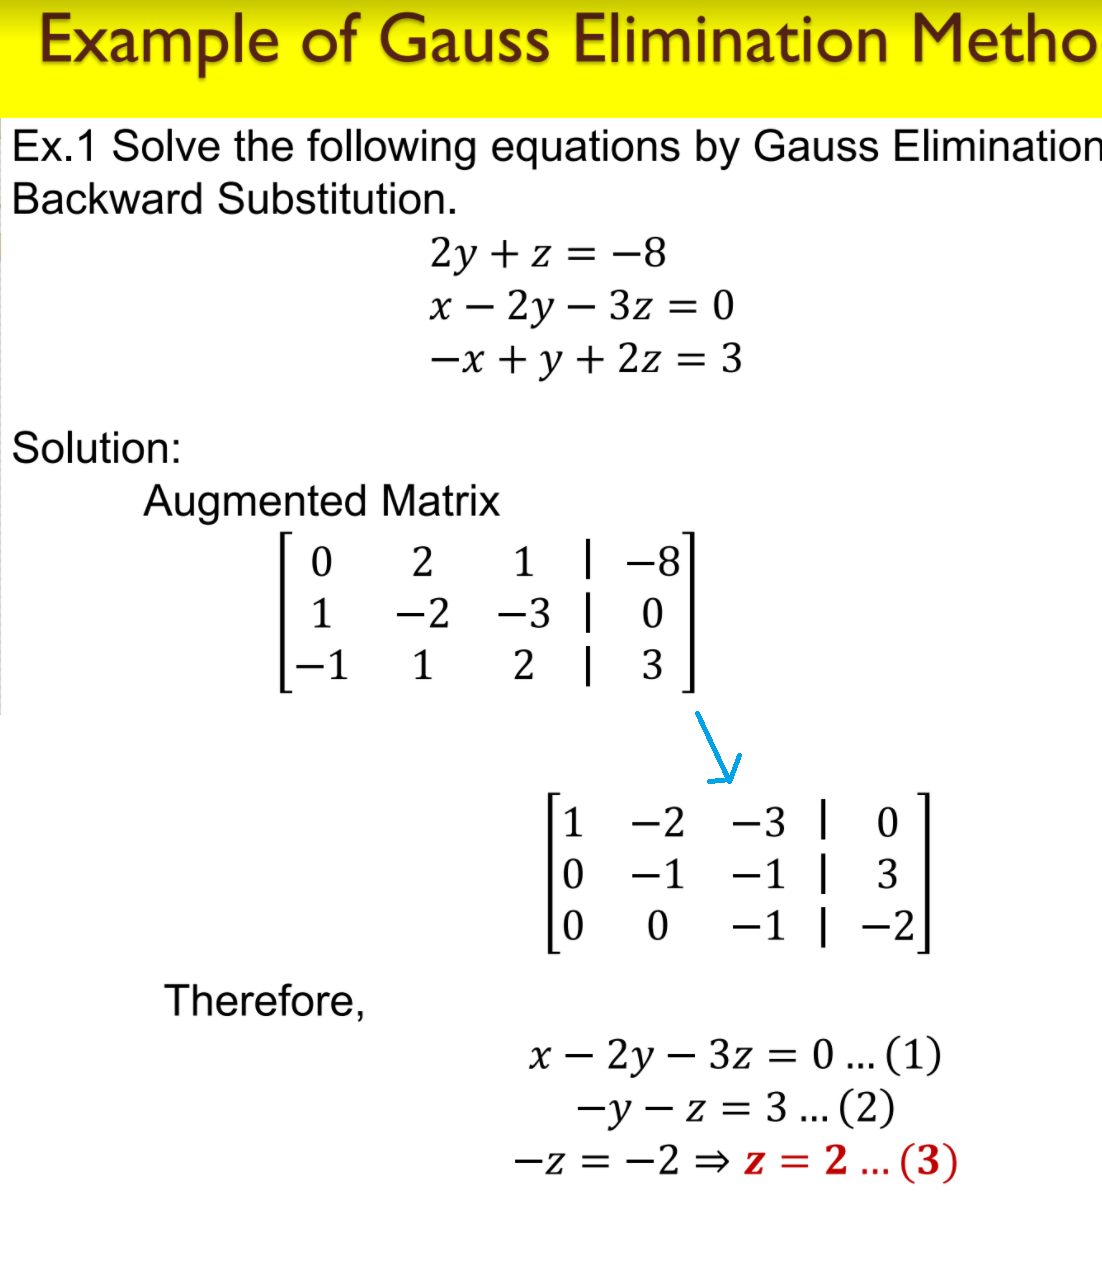

# **Gauss-Jordan**

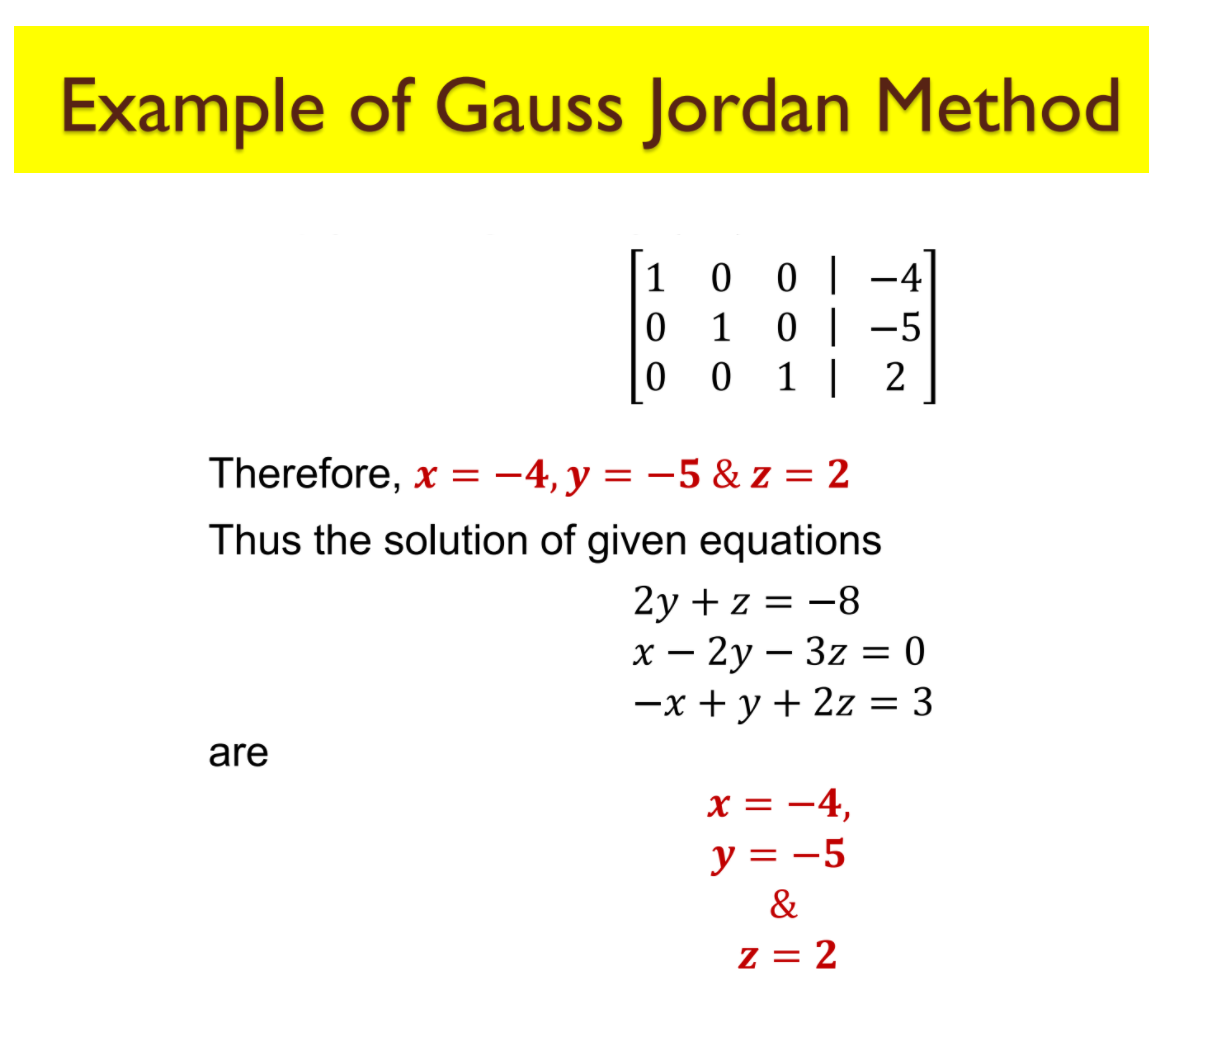

In [ ]:
A = np.array([[0,2,1],
              [1,-2,-3],
              [-1,1,2]])

B = np.array([[-8],
              [0],
              [3]])

# **Código de Gauss y Gauss-Jordan**

In [ ]:
# Método de Gauss-Jordan
# Solución a Sistemas de Ecuaciones
# de la forma A.X=B
# http://blog.espol.edu.ec/analisisnumerico/3-4-gauss-jordan-metodo/

import numpy as np

# INGRESO
A = np.array([[0,2,1],
              [1,-2,-3],
              [-1,1,2]])

B = np.array([[-8],
              [0],
              [3]])

# PROCEDIMIENTO
casicero = 1e-15 # Considerar como 0
# Evitar truncamiento en operaciones
A = np.array(A,dtype=float) 

# Matriz aumentada
AB = np.concatenate((A,B),axis=1)
AB0 = np.copy(AB)

# Pivoteo parcial por filas
tamano = np.shape(AB)
n = tamano[0]
m = tamano[1]

# Para cada fila en AB
for i in range(0,n-1,1):
    # columna desde diagonal i en adelante
    columna = abs(AB[i:,i])
    dondemax = np.argmax(columna)
    
    # dondemax no está en diagonal
    if (dondemax !=0):
        # intercambia filas
        temporal = np.copy(AB[i,:])
        AB[i,:] = AB[dondemax+i,:]
        AB[dondemax+i,:] = temporal
AB1 = np.copy(AB)

# eliminacion hacia adelante (hasta aqui, tiene el triangular superior (Gauss))
for i in range(0,n-1,1):
    pivote = AB[i,i]
    adelante = i+1
    for k in range(adelante,n,1):
        factor = AB[k,i]/pivote
        AB[k,:] = AB[k,:] - AB[i,:]*factor
AB2 = np.copy(AB)

# elimina hacia atras (aqui vemos la matriz identidad (Gauss-Jordan))
ultfila = n-1
ultcolumna = m-1
for i in range(ultfila,0-1,-1):
    pivote = AB[i,i]
    atras = i-1 
    for k in range(atras,0-1,-1):
        factor = AB[k,i]/pivote
        AB[k,:] = AB[k,:] - AB[i,:]*factor
    # diagonal a unos
    AB[i,:] = AB[i,:]/AB[i,i]
X = np.copy(AB[:,ultcolumna])
X = np.transpose([X])


# SALIDA
print('Matriz aumentada:')
print(AB0)
print('Pivoteo parcial por filas')
print(AB1)
print('eliminacion hacia adelante (hasta aqui, tiene el triangular superior (Gauss)')
print(AB2)
print('eliminación hacia atrás (aqui vemos la matriz identidad (Gauss-Jordan)')
print(AB)
print('solución de X: ')
print(X)

Matriz aumentada:
[[ 0.  2.  1. -8.]
 [ 1. -2. -3.  0.]
 [-1.  1.  2.  3.]]
Pivoteo parcial por filas
[[ 1. -2. -3.  0.]
 [ 0.  2.  1. -8.]
 [-1.  1.  2.  3.]]
eliminacion hacia adelante (hasta aqui, tiene el triangular superior (Gauss)
[[ 1.  -2.  -3.   0. ]
 [ 0.   2.   1.  -8. ]
 [ 0.   0.  -0.5 -1. ]]
eliminación hacia atrás (aqui vemos la matriz identidad (Gauss-Jordan)
[[ 1.  0.  0. -4.]
 [ 0.  1.  0. -5.]
 [-0. -0.  1.  2.]]
solución de X: 
[[-4.]
 [-5.]
 [ 2.]]


# ecuaciones incompatibles

ecuaciones incompatibles (a) (ver slides, imagen de Chapra)
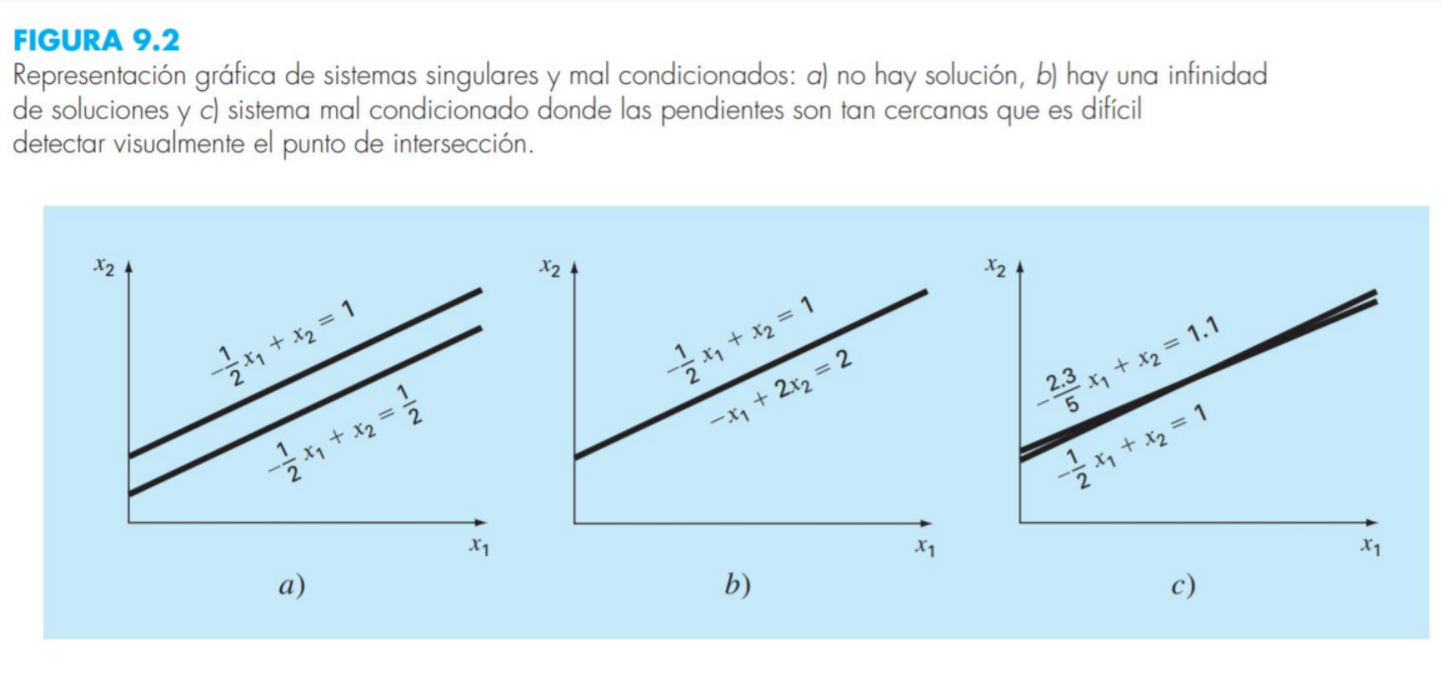


11x + 4y = 7

132x + 48y =-1

```
A = np.array([[11,4],
              [132, 48]])

B = np.array([[7],
              [-1]])
```

el resultado de a) es asi, porque la ecuaciones son---(**tarea**)

Las ecuaciones se corresponden gráficamente con dos rectas, ambas con la misma pendiente, Al ser paralelas, no se cortan en ningún punto, es decir, no existe ningún valor que satisfaga a la vez ambas ecuaciones.

Matemáticamente un sistema de estos es incompatible cuando el rango de la matriz del sistema es inferior al rango de la matriz ampliada. Una condición necesaria para que esto suceda es que el determinante de la matriz del sistema sea cero:

**det(A)=0** , por esto mismo del ejemplo det(A)=11*48-132*4=0
# Tiene formato de código
```



Ecuaciones incompatibles (b)

In [ ]:
A = np.array([[-0.5,1],
              [-1,2]])

B = np.array([[1],
              [2]])

El resultado hasta formar la triangular superior (Gauss) es (**tarea**):


```
[[-1.  2.  2.]
 [ 0.  0.  0.]]

#reemplazando el resultado en la primeracion ecuación...
 -0.5x1 + x2 = 1
-x1 + 2x2 = 2

-0.5(-1) + 2x2 =2
 0.5 + 2x2 = 2





       

### explicacion 
tanto la primera como la segunda ecuacion tienen la misma pendiente.pero entre ellas no hay nigun punto de interseccion esto indica que son rectas paralelas.y no hay solucion puesto que no tienen nigun punto coincidente o en el que se intersectan.

ecuaciones dispersas


In [ ]:
# INGRESO
A = np.array([[0,2,0,0,1],
              [0,0,-2,1,0],
              [3,0,0,0,3],
              [0,0,0,0,3],
              [-1,0,0,0,0]])

B = np.array([[-8],
              [0],
              [3],
              [2],
              [-1]])

# **Método de Gauss-Seidel**

El método de Gauss-Seidel es particularmente adecuado cuando se tiene gran
número de ecuaciones. En estos casos, los métodos de eliminación pueden estar sujetos
a errores de redondeo. Debido a que el error en el método de Gauss-Seidel es determinado por el número de iteraciones, el error de redondeo no es un tema que preocupe a este
método. Aunque, existen ciertos ejemplos donde la técnica de Gauss-Seidel no convergerá al resultado correcto.

http://artemisa.unicauca.edu.co/~cardila/Chapra.pdf

**Ejercicio Propuesto: (TAREA)**

Por ejemplo, imagínate que después de operar con la matriz de Gauss de un sistema nos queda:


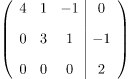

Como la última fila es image.png, es decir tres 0 seguidos con un número al final, es un SI (Sistema Incompatible) y, por tanto, el sistema no tiene solución.

Aunque no hace falta saberlo, a continuación verás por qué no tiene solución.

Si cogemos la última fila, tendríamos esta ecuación:

image.png

Esta ecuación nunca se cumplirá, porque independientemente del valor que tome z, al multiplicarlo por 0 nunca dará 2 (cualquier número multiplicado por 0 siempre da 0). Y como nunca se cumplirá esta ecuación, el sistema no tiene solución.

In [ ]:
encontrar ciertos ejemplos donde Gauss-Seidel no converge al resultado correcto

In [ ]:
# Método de Gauss-Seidel
# solución de sistemas de ecuaciones
# por métodos iterativos

import numpy as np

# INGRESO
A = np.array([[3. , -0.1, -0.2],
              [0.1,  7  , -0.3],
              [0.3, -0.2, 10  ]])

B = np.array([7.85,-19.3,71.4])

X0  = np.array([0.,0.,0.,0.,0.])

tolera = 0.00001
iteramax = 100

# PROCEDIMIENTO

# Gauss-Seidel
tamano = np.shape(A)
n = tamano[0]
m = tamano[1]
#  valores iniciales
X = np.copy(X0)
diferencia = np.ones(n, dtype=float)
errado = 2*tolera

itera = 0
while not(errado<=tolera or itera>iteramax):
    # por fila
    for i in range(0,n,1):
        # por columna
        suma = 0 
        for j in range(0,m,1):
            # excepto diagonal de A
            if (i!=j): 
                suma = suma-A[i,j]*X[j]
        
        nuevo = (B[i]+suma)/A[i,i]
        diferencia[i] = np.abs(nuevo-X[i])
        X[i] = nuevo
    errado = np.max(diferencia)
    itera = itera + 1

# Respuesta X en columna
X = np.transpose([X])

# revisa si NO converge
if (itera>iteramax):
    X=0
# revisa respuesta
verifica = np.dot(A,X)

# SALIDA
print('respuesta X: ')
print(X)
print('verificar A.X=B: ')
print(verifica)

respuesta X: 
[[ 3. ]
 [-2.5]
 [ 7. ]]
verificar A.X=B: 
[[  7.84999999]
 [-19.3       ]
 [ 71.4       ]]


In [ ]:
# Defining our function as seidel which takes 3 arguments 
# as A matrix, Solution and B matrix 
#https://www.geeksforgeeks.org/gauss-seidel-method/#:~:text=The%20Gauss%E2%80%93Seidel%20method%20is,linear%20equations%20with%20unknown%20x.&text=%2C%20to%20find%20the%20system%20of%20equation%20x%20which%20satisfy%20this%20condition.

def seidel(a, x ,b): 
	#Finding length of a(3)	 
	n = len(a)				 
	# for loop for 3 times as to calculate x, y , z 
	for j in range(0, n):		 
		# temp variable d to store b[j] 
		d = b[j]				 
		
		# to calculate respective xi, yi, zi 
		for i in range(0, n):	 
			if(j != i): 
				d-=a[j][i] * x[i] 
		# updating the value of our solution		 
		x[j] = d / a[j][j] 
	# returning our updated solution		 
	return x	 

# int(input())input as number of variable to be solved				 
n = 3							
a = []							 
b = []		 
# initial solution depending on n(here n=3)					 
x = [0, 0, 0]						 
a = [[4, 1, 2],[3, 5, 1],[1, 1, 3]] 
b = [4,7,3] 
print(x) 

#loop run for m times depending on m the error value 
for i in range(0, 25):			 
	x = seidel(a, x, b) 
	#print each time the updated solution 
	print(x)					 


[0, 0, 0]
[1.0, 0.8, 0.39999999999999997]
[0.6000000000000001, 0.9599999999999997, 0.48000000000000004]
[0.52, 0.9919999999999998, 0.49600000000000005]
[0.504, 0.9983999999999998, 0.4992000000000001]
[0.5008, 0.99968, 0.49984]
[0.5001599999999999, 0.9999360000000002, 0.4999679999999999]
[0.500032, 0.9999872, 0.4999936]
[0.5000064, 0.9999974400000001, 0.49999871999999995]
[0.50000128, 0.999999488, 0.4999997439999999]
[0.500000256, 0.9999998976000001, 0.49999994880000004]
[0.5000000512, 0.9999999795199999, 0.4999999897600001]
[0.50000001024, 0.999999995904, 0.499999997952]
[0.500000002048, 0.9999999991808, 0.49999999959040003]
[0.5000000004095999, 0.9999999998361601, 0.49999999991808003]
[0.50000000008192, 0.9999999999672321, 0.49999999998361594]
[0.500000000016384, 0.9999999999934465, 0.49999999999672307]
[0.5000000000032768, 0.9999999999986894, 0.4999999999993445]
[0.5000000000006554, 0.9999999999997378, 0.49999999999986894]
[0.500000000000131, 0.9999999999999478, 0.49999999999997374]


el código con scipy
https://www.patnauniversity.ac.in/e-content/science/physics/MScPhy52.pdf

In [ ]:
import numpy as np
from scipy.linalg import solve

def GaussSeidel(A, B, x, n):
 L=np.tril(A)
 U=A-L
 
 for i in range(n):
   x = np.dot(np.linalg.inv(L), B - np.dot(U, x))
 print(x)
 return x

'''___Main___'''
A = eval(input('Enter the matrix A:'))
# as np.array([[a11,a12],[a21,a22]])
B = eval(input('Enter the matrix B:'))# as [b1,b2]
x = eval(input('Enter guess of x:')) # as [x1,x2]
n = eval(input('Enter the number of Iterations:'))
x = GaussSeidel(A, B, x, n)
print ('Solution using the solve syntax:\n', solve(A, B))

Enter the matrix A:[[2,1],[3,7]]
Enter the matrix B:[4,3]
Enter guess of x:[0,0]
Enter the number of Iterations:50
[ 2.27272727 -0.54545455]
Solution using the solve syntax:
 [ 2.27272727 -0.54545455]
